# Plots position for all stocks


`Must restart the notebook and run all each time`

In [1]:
FROM = 251
TO = 501

In [2]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
from main import getMyPosition as getPosition

nInst = 0
nt = 0
commRate = 0.0010
dlrPosLimit = 10000

position = []

def loadPrices(fn):
    global nt, nInst
    #df=pd.read_csv(fn, sep='\s+', names=cols, header=None, index_col=0)
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    nt, nInst = df.values.shape
    return (df.values).T

pricesFile="./data/prices.txt"
prcAll = loadPrices(pricesFile)
print ("Loaded %d instruments for %d days" % (nInst, nt))

currentPos = np.zeros(nInst)

def calcPL(prcHist):
    cash = 0
    curPos = np.zeros(nInst)
    totDVolume = 0
    totDVolumeSignal = 0
    totDVolumeRandom = 0
    value = 0
    todayPLL = []
    (_,nt) = prcHist.shape
    for t in range(FROM, TO): 
        prcHistSoFar = prcHist[:,:t]
        newPosOrig = getPosition(prcHistSoFar)
        curPrices = prcHistSoFar[:,-1] #prcHist[:,t-1]
        posLimits = np.array([int(x) for x in dlrPosLimit / curPrices])
        clipPos = np.clip(newPosOrig, -posLimits, posLimits)
        newPos = np.array([np.trunc(x) for x in clipPos])
        deltaPos = newPos - curPos
        dvolumes = curPrices * np.abs(deltaPos)
        dvolume = np.sum(dvolumes)
        totDVolume += dvolume
        comm = dvolume * commRate
        cash -= curPrices.dot(deltaPos) + comm
        curPos = np.array(newPos)
        posValue = curPos.dot(curPrices)
        todayPL = cash + posValue - value
        todayPLL.append(todayPL)
        value = cash + posValue
        ret = 0.0

        position.append(newPos)

        if (totDVolume > 0):
            ret = value / totDVolume
        print ("Day %d value: %.2lf todayPL: $%.2lf $-traded: %.0lf return: %.5lf" % (t,value, todayPL, totDVolume, ret))
    pll = np.array(todayPLL)
    (plmu,plstd) = (np.mean(pll), np.std(pll))
    annSharpe = 0.0
    if (plstd > 0):
        annSharpe = np.sqrt(250) * plmu / plstd
    return (plmu, ret, plstd, annSharpe, totDVolume)



(meanpl, ret, plstd, sharpe, dvol) = calcPL(prcAll)
score = meanpl - 0.1*plstd
print ("=====")
print ("mean(PL): %.1lf" % meanpl)
print ("return: %.5lf" % ret)
print ("StdDev(PL): %.2lf" % plstd)
print ("annSharpe(PL): %.2lf " % sharpe)
print ("totDvolume: %.0lf " % dvol)
print ("Score: %.2lf" % score)

Loaded 50 instruments for 750 days
Day 251 value: -15.23 todayPL: $-15.23 $-traded: 15234 return: -0.00100
Day 252 value: -22.31 todayPL: $-7.07 $-traded: 32506 return: -0.00069
Day 253 value: -60.99 todayPL: $-38.68 $-traded: 49790 return: -0.00122
Day 254 value: -76.51 todayPL: $-15.52 $-traded: 67031 return: -0.00114
Day 255 value: -144.14 todayPL: $-67.63 $-traded: 87321 return: -0.00165
Day 256 value: -151.16 todayPL: $-7.02 $-traded: 99525 return: -0.00152
Day 257 value: -132.98 todayPL: $18.18 $-traded: 115523 return: -0.00115
Day 258 value: -150.50 todayPL: $-17.52 $-traded: 129263 return: -0.00116
Day 259 value: -167.36 todayPL: $-16.86 $-traded: 147062 return: -0.00114
Day 260 value: -177.38 todayPL: $-10.02 $-traded: 157428 return: -0.00113
Day 261 value: -320.07 todayPL: $-142.69 $-traded: 169581 return: -0.00189
Day 262 value: -311.94 todayPL: $8.13 $-traded: 182349 return: -0.00171
Day 263 value: -410.21 todayPL: $-98.27 $-traded: 195849 return: -0.00209
Day 264 value: -2

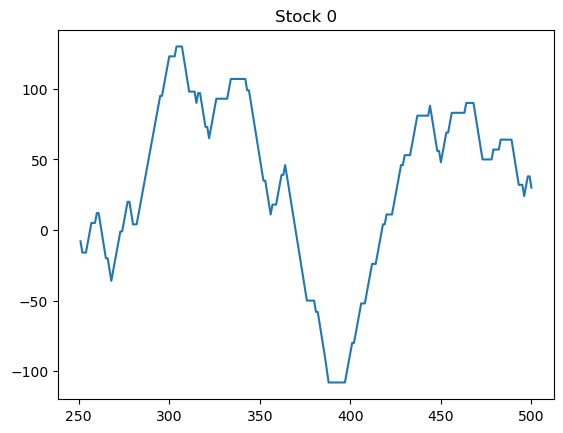

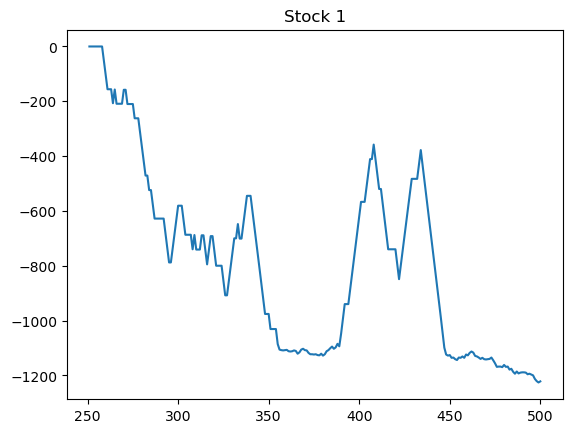

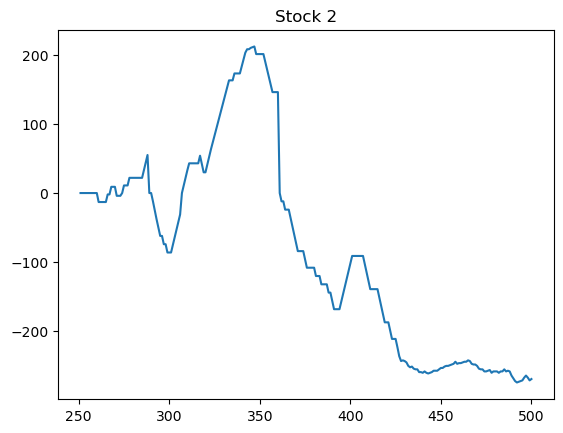

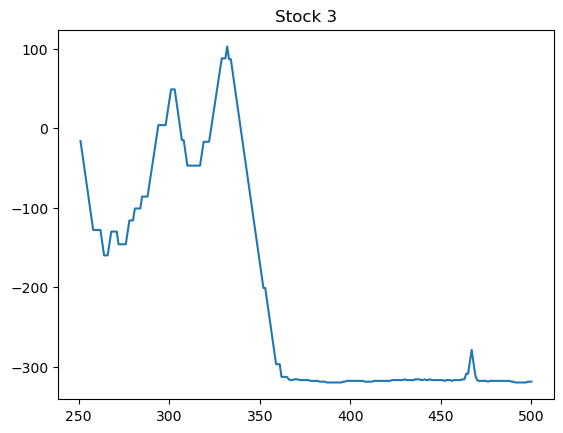

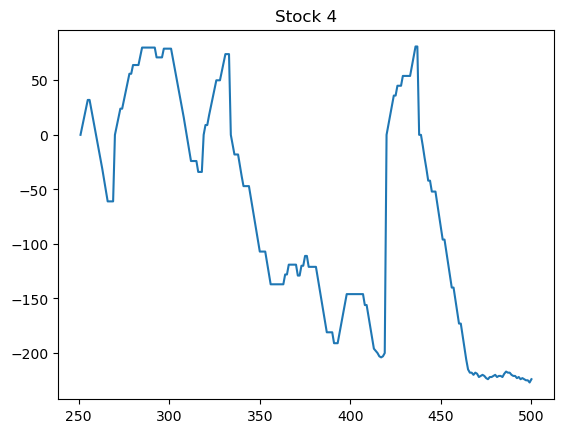

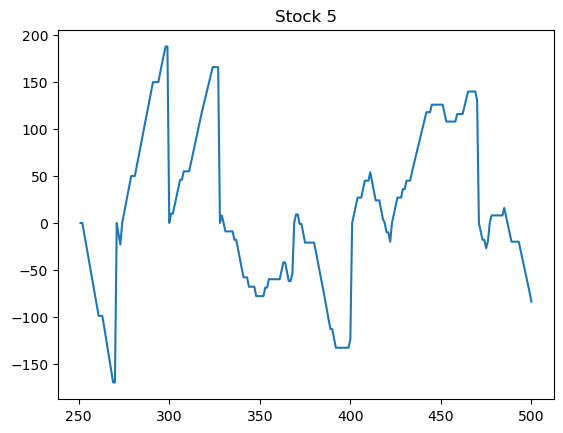

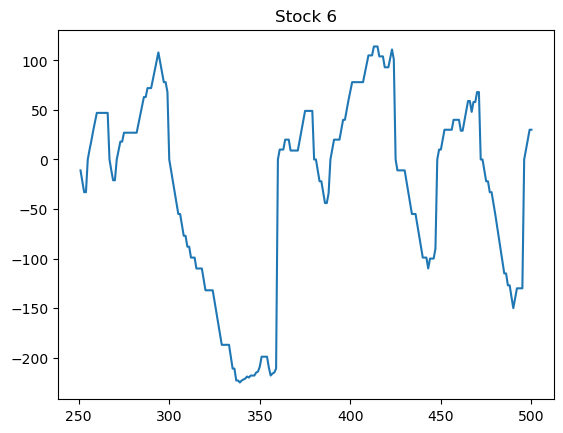

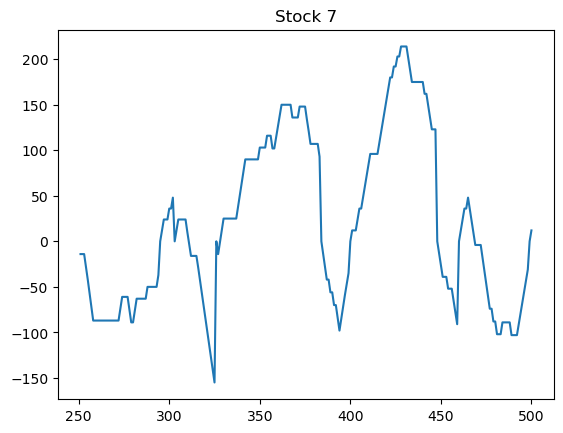

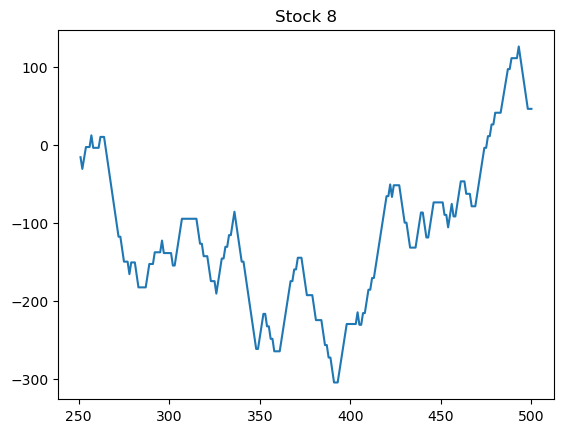

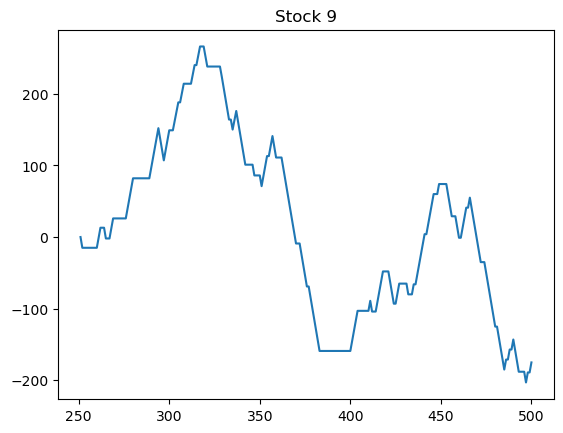

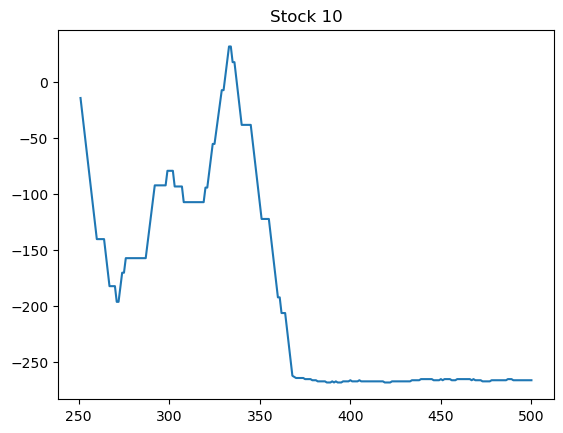

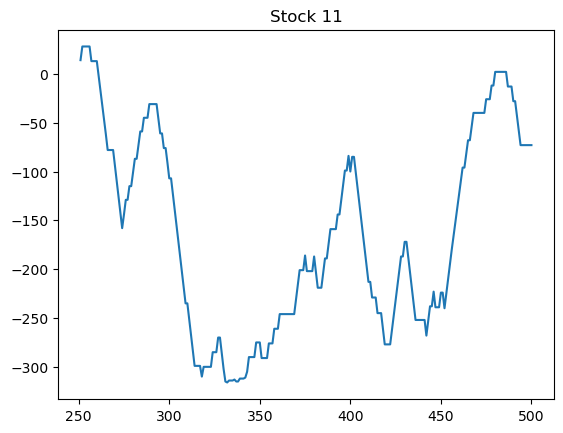

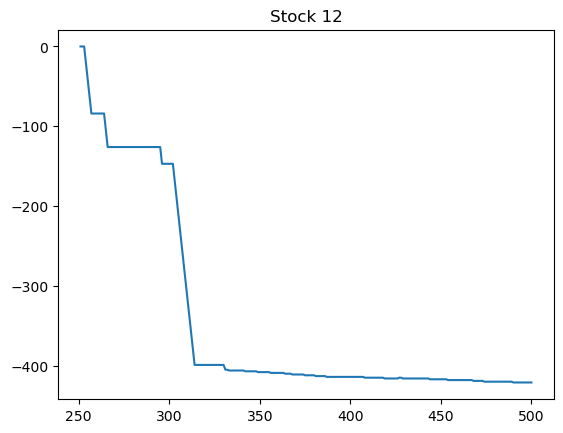

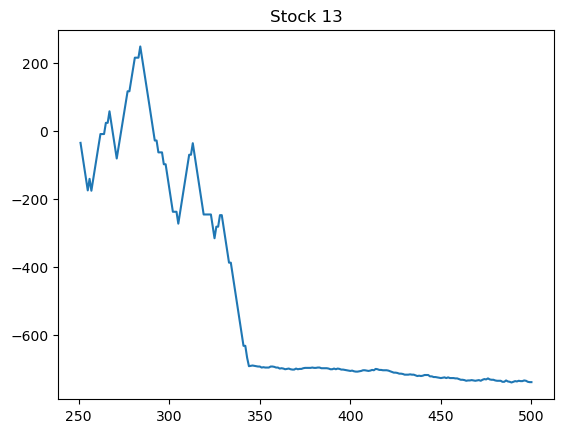

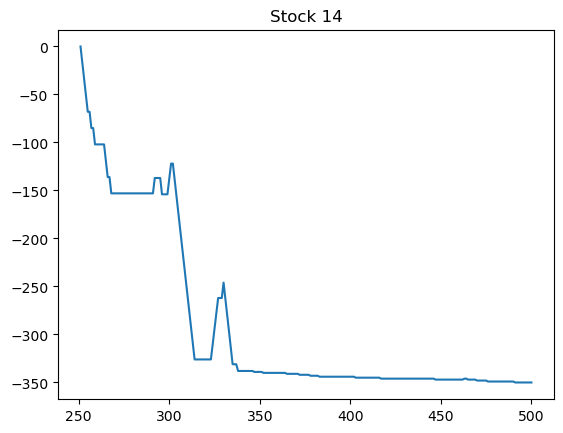

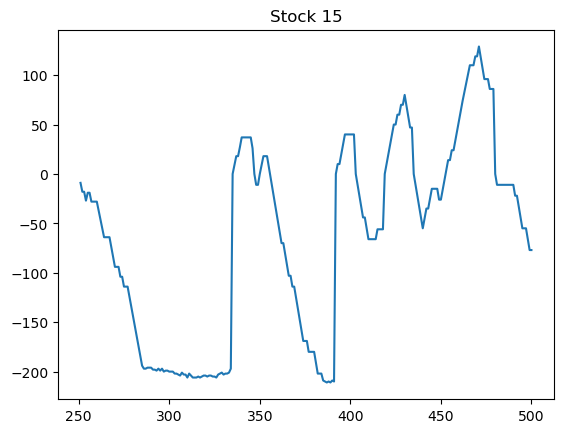

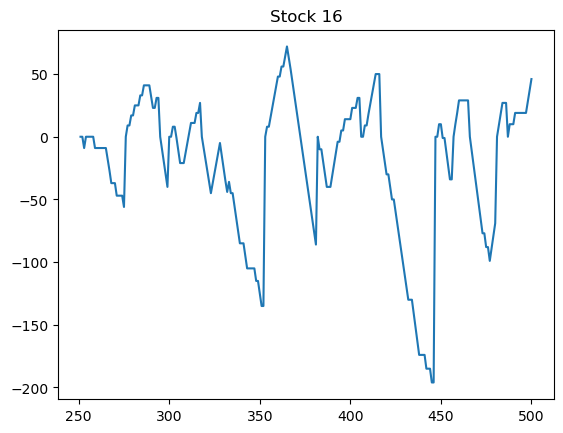

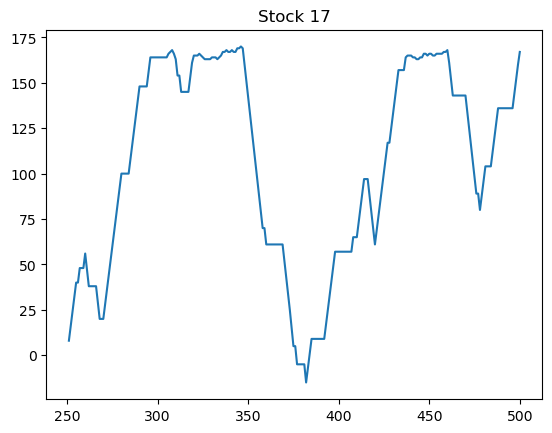

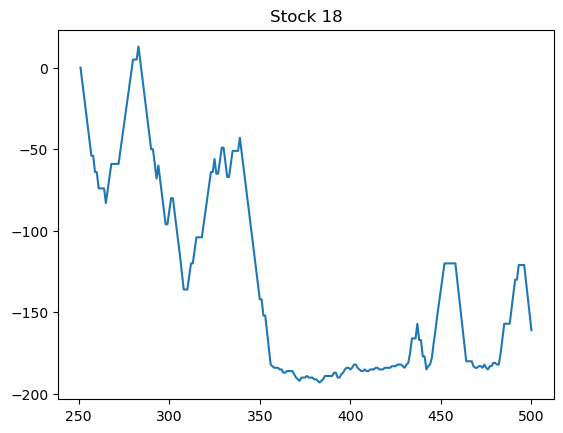

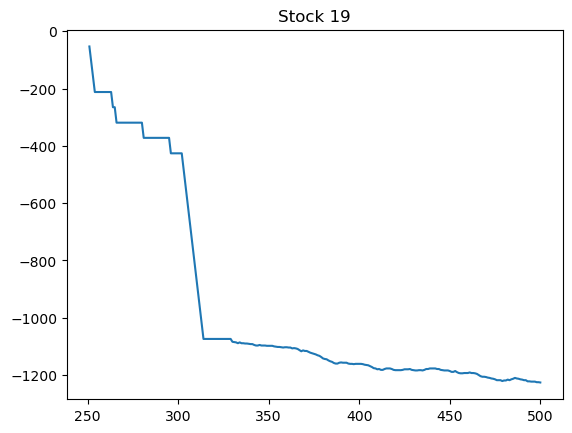

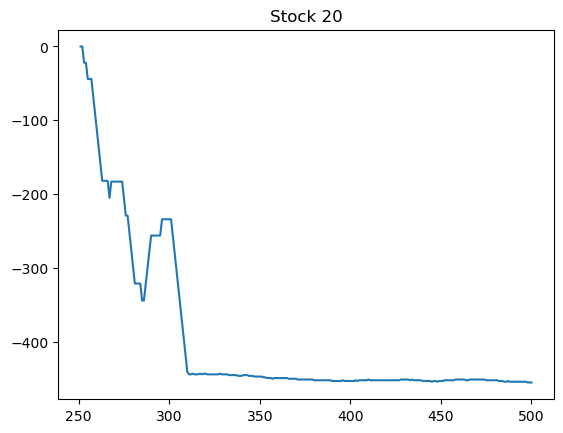

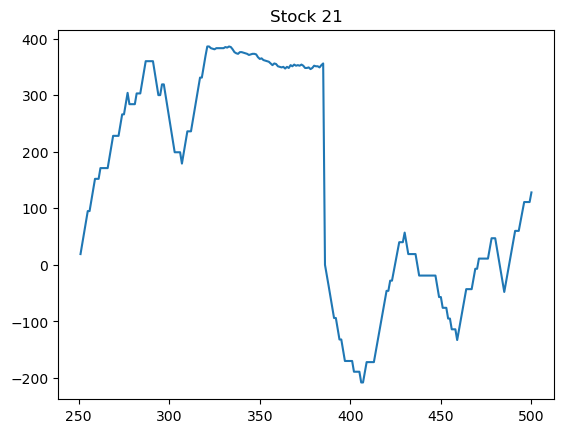

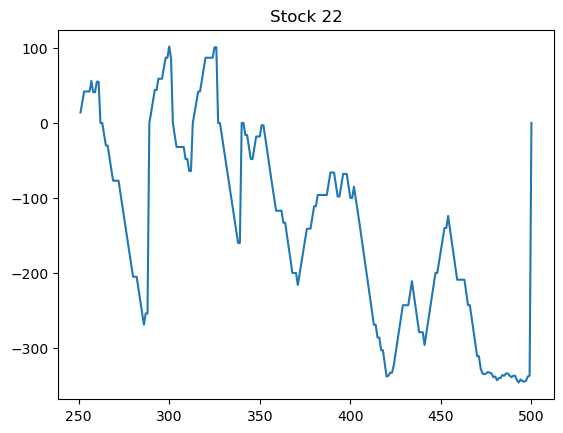

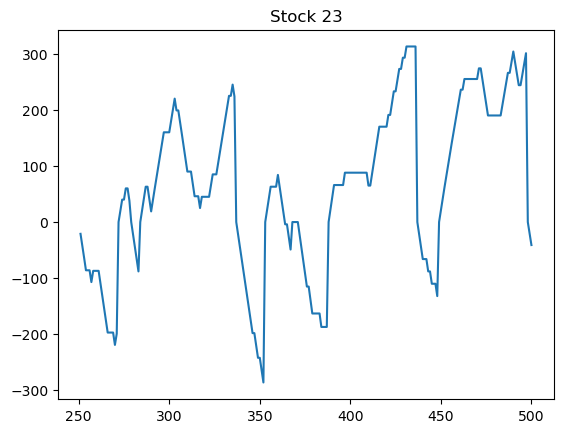

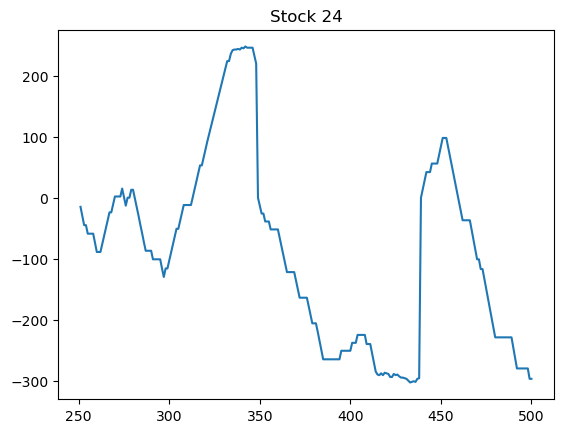

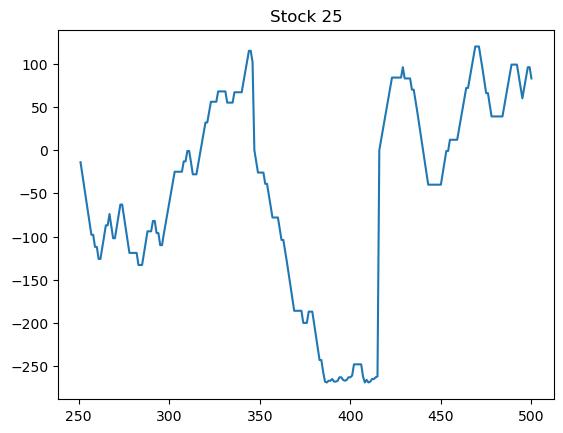

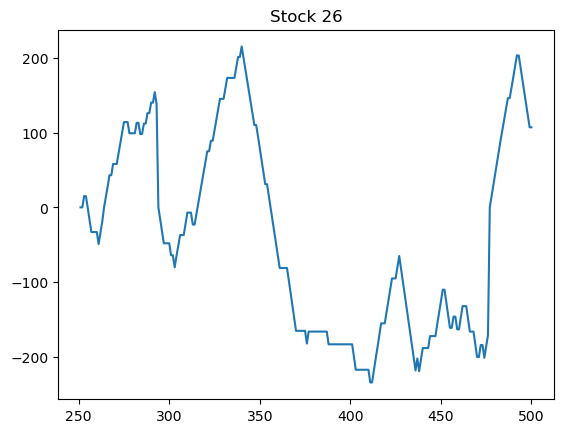

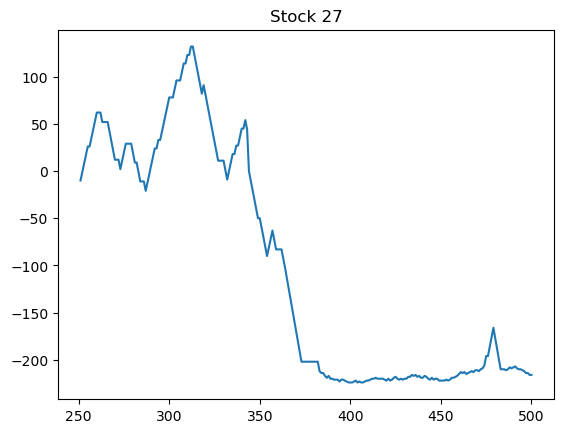

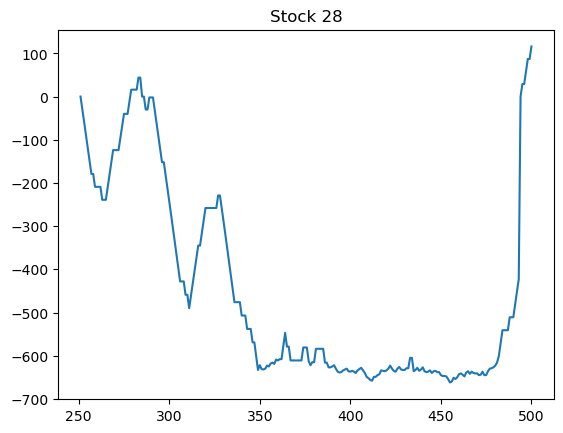

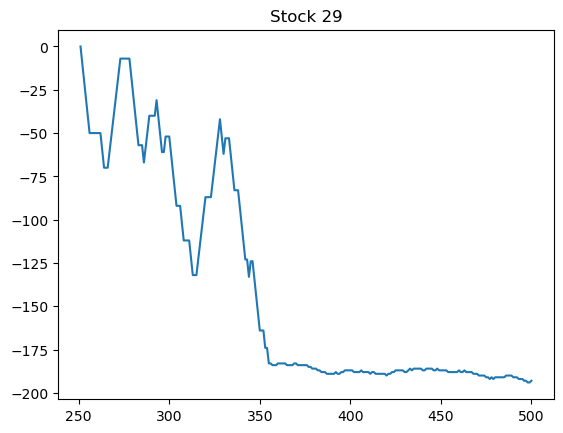

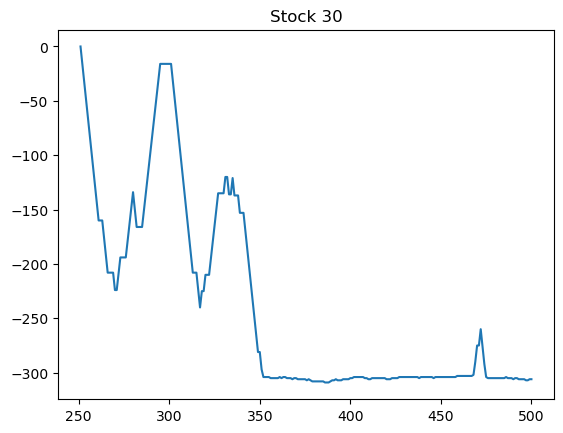

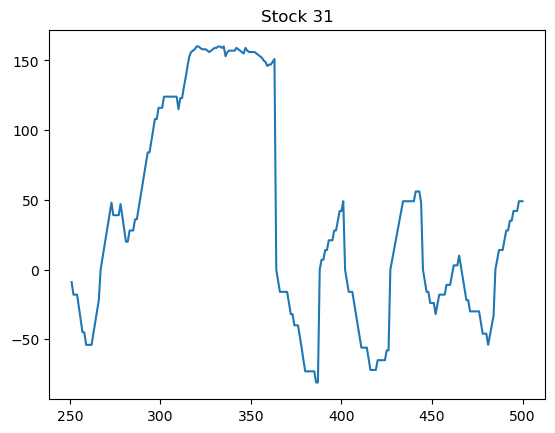

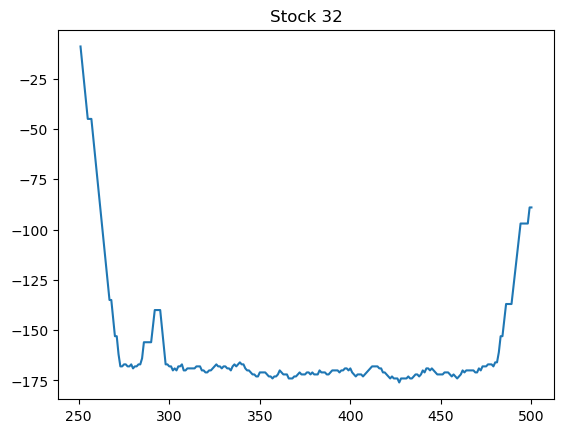

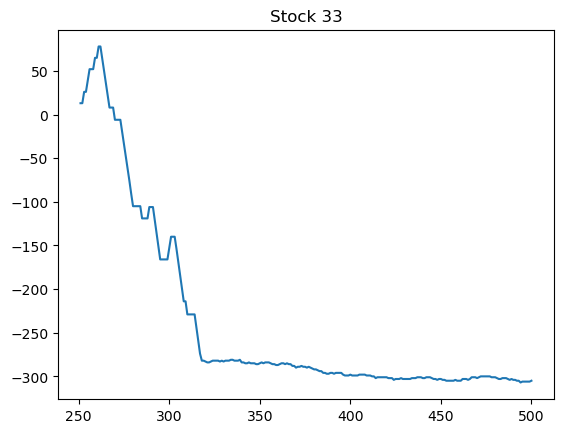

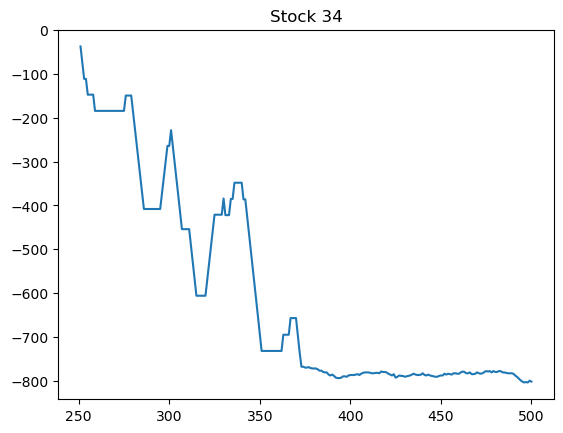

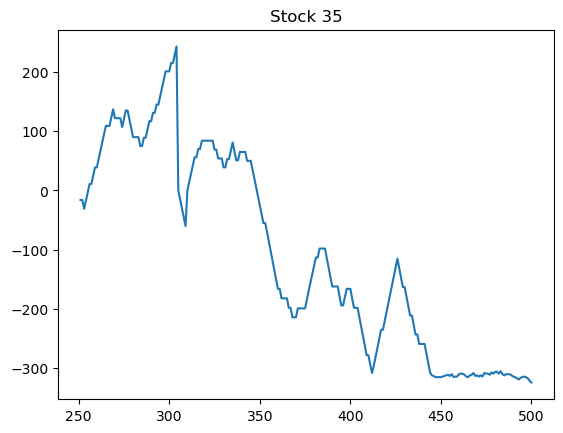

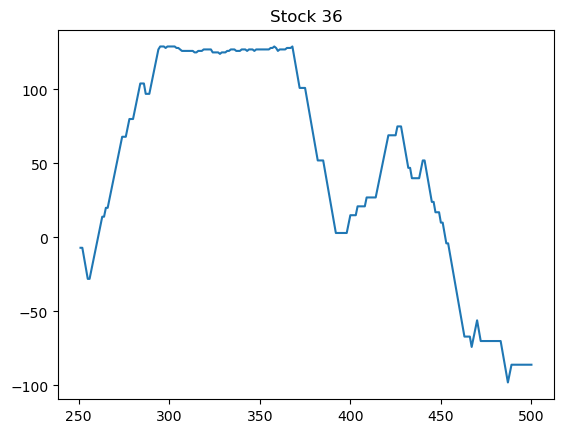

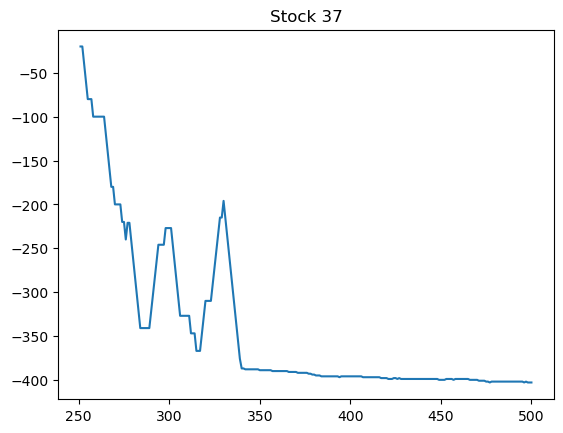

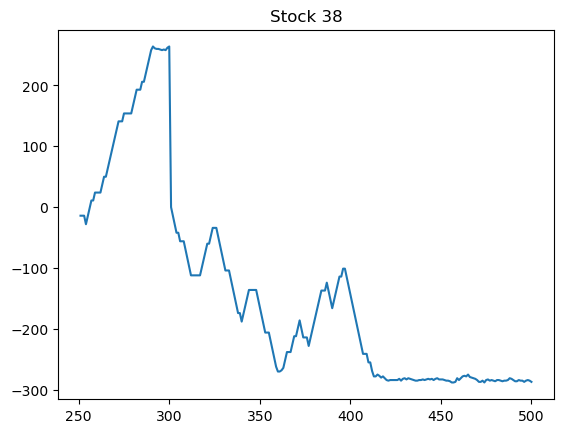

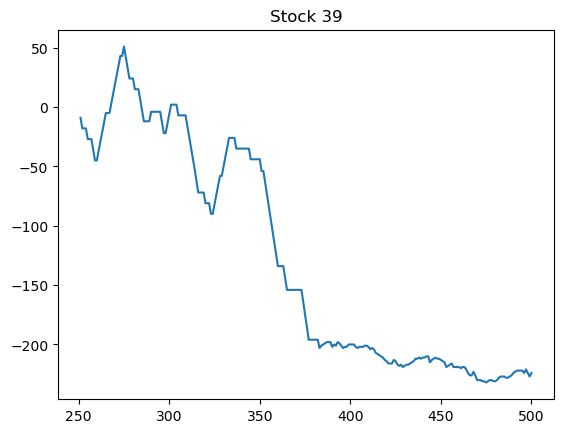

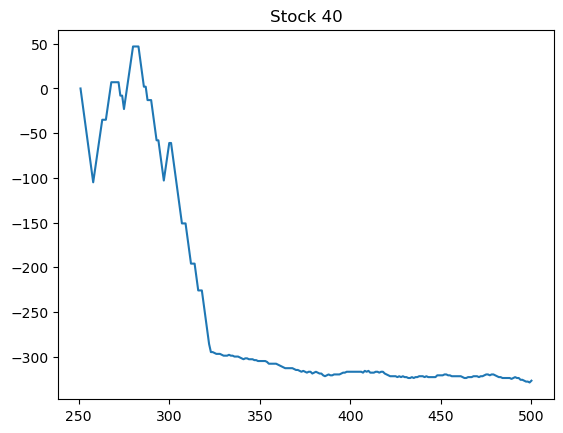

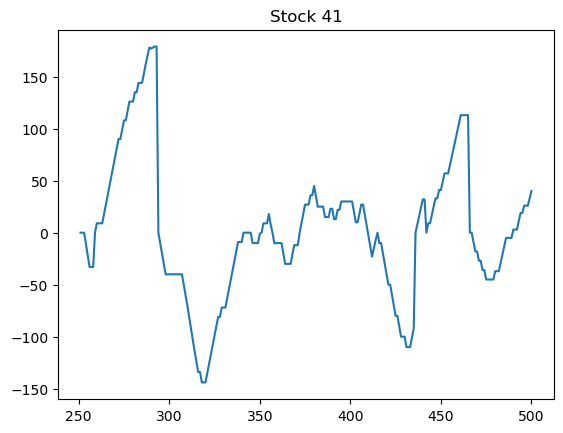

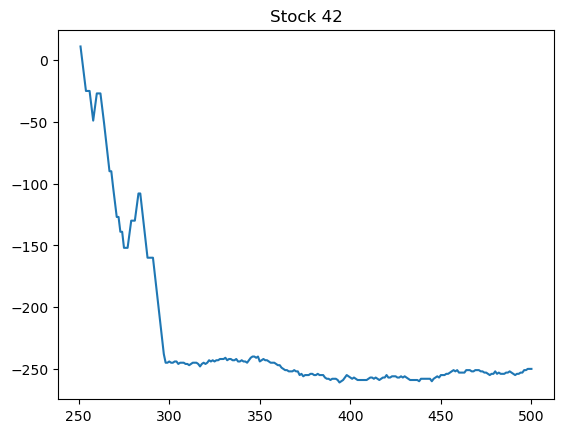

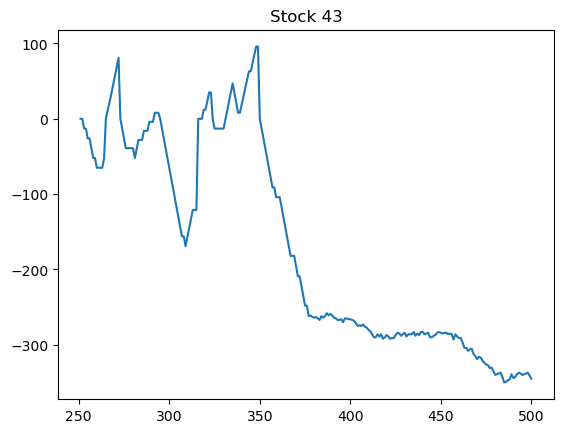

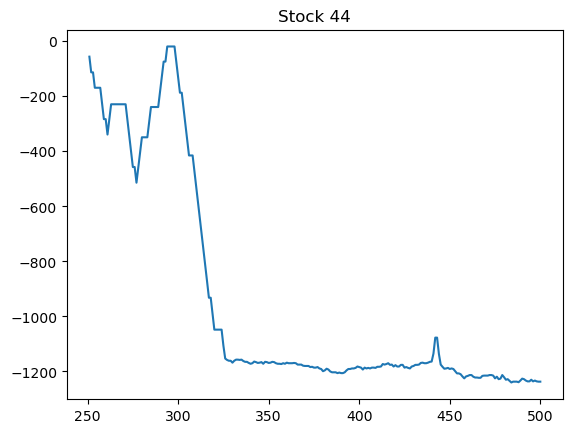

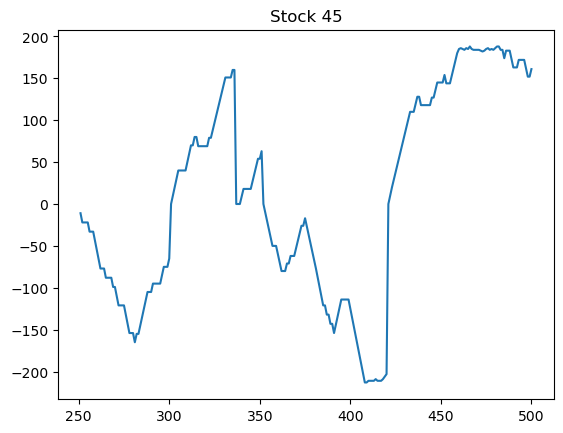

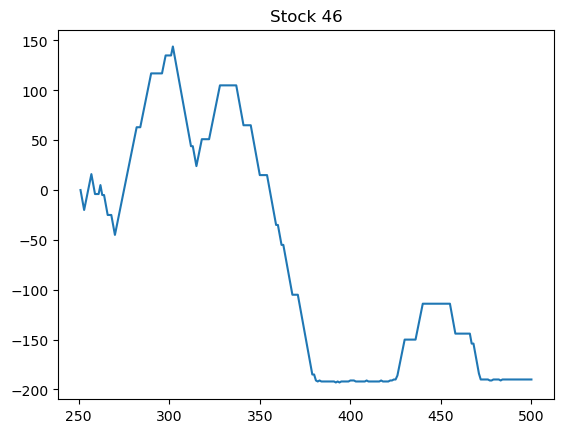

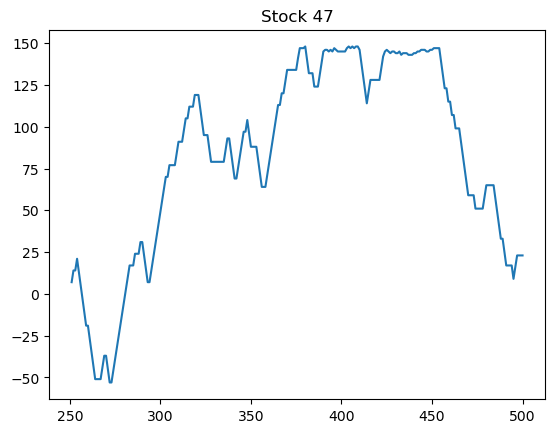

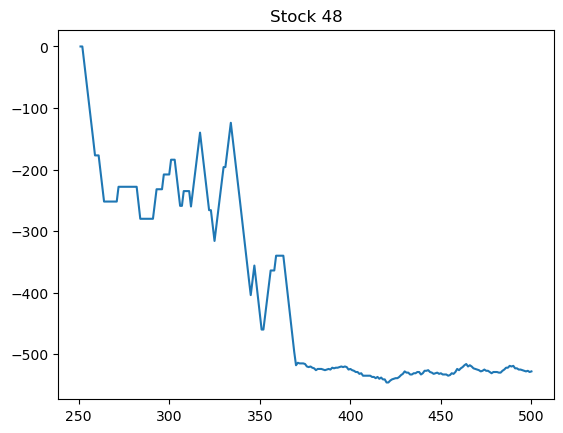

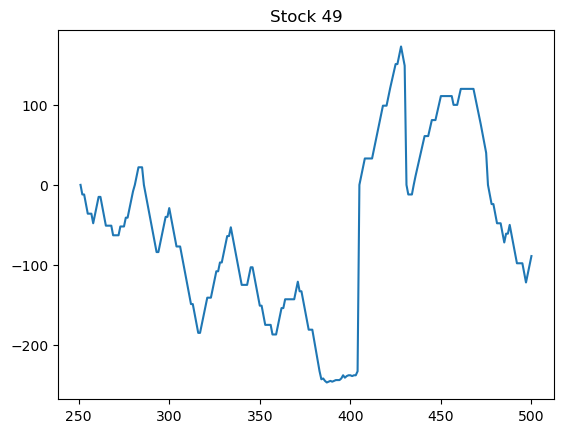

In [3]:
import matplotlib.pyplot as plt
import numpy as np

position = np.array(position)

for i in range(0, 50):
    plt.plot(range(FROM,TO), position[:,i])
    plt.title(f"Stock {i}")
    plt.show()